<h1 style="text-align: center; background-color:#E9F7EF; font-family:Arial; color:#526085">ĐỒ ÁN THỰC HÀNH</h1>
<h2>I. Đặt và trả lời câu hỏi</h2>

<h4>📂 Import các thư viện cần dùng</h4>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

# Data vislization using plolty graph object(go)
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
import plotly.express as px

<h4>📂 Đọc file dữ liệu và in ra 5 dòng đầu tiên</h4>

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.0,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.0,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.0,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.0,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.0,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0


<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 1</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Số lượng chuyến bay, số chuyến bị delay và bị hủy mỗi năm thay đổi như thế nào? (Xét nửa đầu và cuối mỗi năm).
</div>
</br>
<div  style="font-family:sans-serif;">📍 Câu trả lời góp phần dự đoán xu hướng họat động của đường hàng không các năm gần đây. Từ đó, có cái nhìn chung về sự ảnh hưởng và khả năng hồi phục của đường hàng không trước và sau dịch bệnh Covid 19</div>


<div  style="font-family:sans-serif;">⚙ Vì số liệu thu thập từ 1/2017 đến hết tháng 7/2022, ta bỏ qua tháng 7/2022 để xét được từng nửa năm. Sau đó ta thêm cột year period để thể hiện nửa đầu/cuối mỗi năm.</div>


In [7]:
def period_year(year, month):
    if month <= 6:
        return str(int(year)) + '/1'
    else:
        return str(int(year)) + '/2'
    
df_year = df[['year','month','arr_flights','arr_del15', 'arr_cancelled']]
df_year = df_year[(df_year['year'] != 2022) | (df_year['month'] < 7)]
df_year['year period'] = df_year.apply(lambda x: period_year(x['year'], x['month']), axis=1)

<div  style="font-family:sans-serif;">⚙ Đổi tên các cột cho dễ hiểu, ta có 3 cột giá trị: Trễ chuyến, Hủy chuyến, Tổng số chuyến, dại diện cho số lượng chuyến bay tương ứng. Nhóm theo từng nửa năm để tính tổng 3 cột giá trị trên. In ra 5 dòng đầu tiên để kiểm tra.</div>


In [8]:
df0 = df_year[['year period', 'arr_flights','arr_del15','arr_cancelled']].groupby(['year period']).sum().sort_index().reset_index()
df0 = df0.rename(columns = {'arr_del15':"Trễ chuyến", 'arr_cancelled': "Hủy chuyến", 'arr_flights': 'Tổng số chuyến'})
df0.head()

,year period,Tổng số chuyến,Trễ chuyến,Hủy chuyến
0,2017/1,2798209.0,550143.0,40541.0
1,2017/2,2876412.0,479331.0,42152.0
2,2018/1,2843312.0,519265.0,44292.0
3,2018/2,3462382.0,660166.0,43547.0
4,2019/1,3634338.0,719135.0,85272.0


<div  style="font-family:sans-serif;">⚙ Trực quan hóa dữ liệu cột Tổng số chuyến bay qua từng nửa năm.</div>


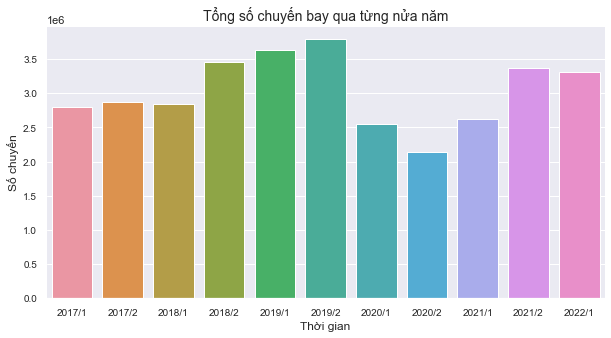

In [9]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
ax0 =  sns.barplot(data = df0, x = 'year period', y = 'Tổng số chuyến')
plt.xlabel('Thời gian', size=12)
plt.ylabel('Số chuyến', size=12)
plt.title('Tổng số chuyến bay qua từng nửa năm', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>📝 Nhận xét: </h3>

Khi xét tổng số chuyến bay trong mỗi nửa năm:
- Từ nửa đầu 2018 về trước và nửa sau 2021 về sau, số lượng chuyến bay giữ số lượng ổn định.

- Số chuyến tăng mạnh từ nửa cuối 2018, tăng liên tục đến nửa sau 2019. Đây là giai đoạn đường hàng không Mỹ phát triển nhất.

- Sau đó từ 2020 số chuyến giảm mạnh. Đây là thời điểm dịch Covid bùng nổ, đường hàng không bị hạn chế do ảnh hưởng của dịch bệnh.
- Nửa sau 2021, số chuyến tăng lại và khá ổn định, tuy vậy số lượng vẫn thấp hơn so với ngay trước dịch bệnh.

=> Covid 19 ảnh hưởng nhiều đến hàng không, hiện tại tuy tình hình dịch bệnh được kiểm soát, tình hình đường hàng không dần ổn định, nhưng vẫn chưa đạt được giá trị cao như ngay trước dịch.

<div  style="font-family:sans-serif;">⚙ Trực quan hóa dữ liệu Số chuyến bị hủy và bị trễ bay qua từng nửa năm bằng biểu đồ đường.</div>


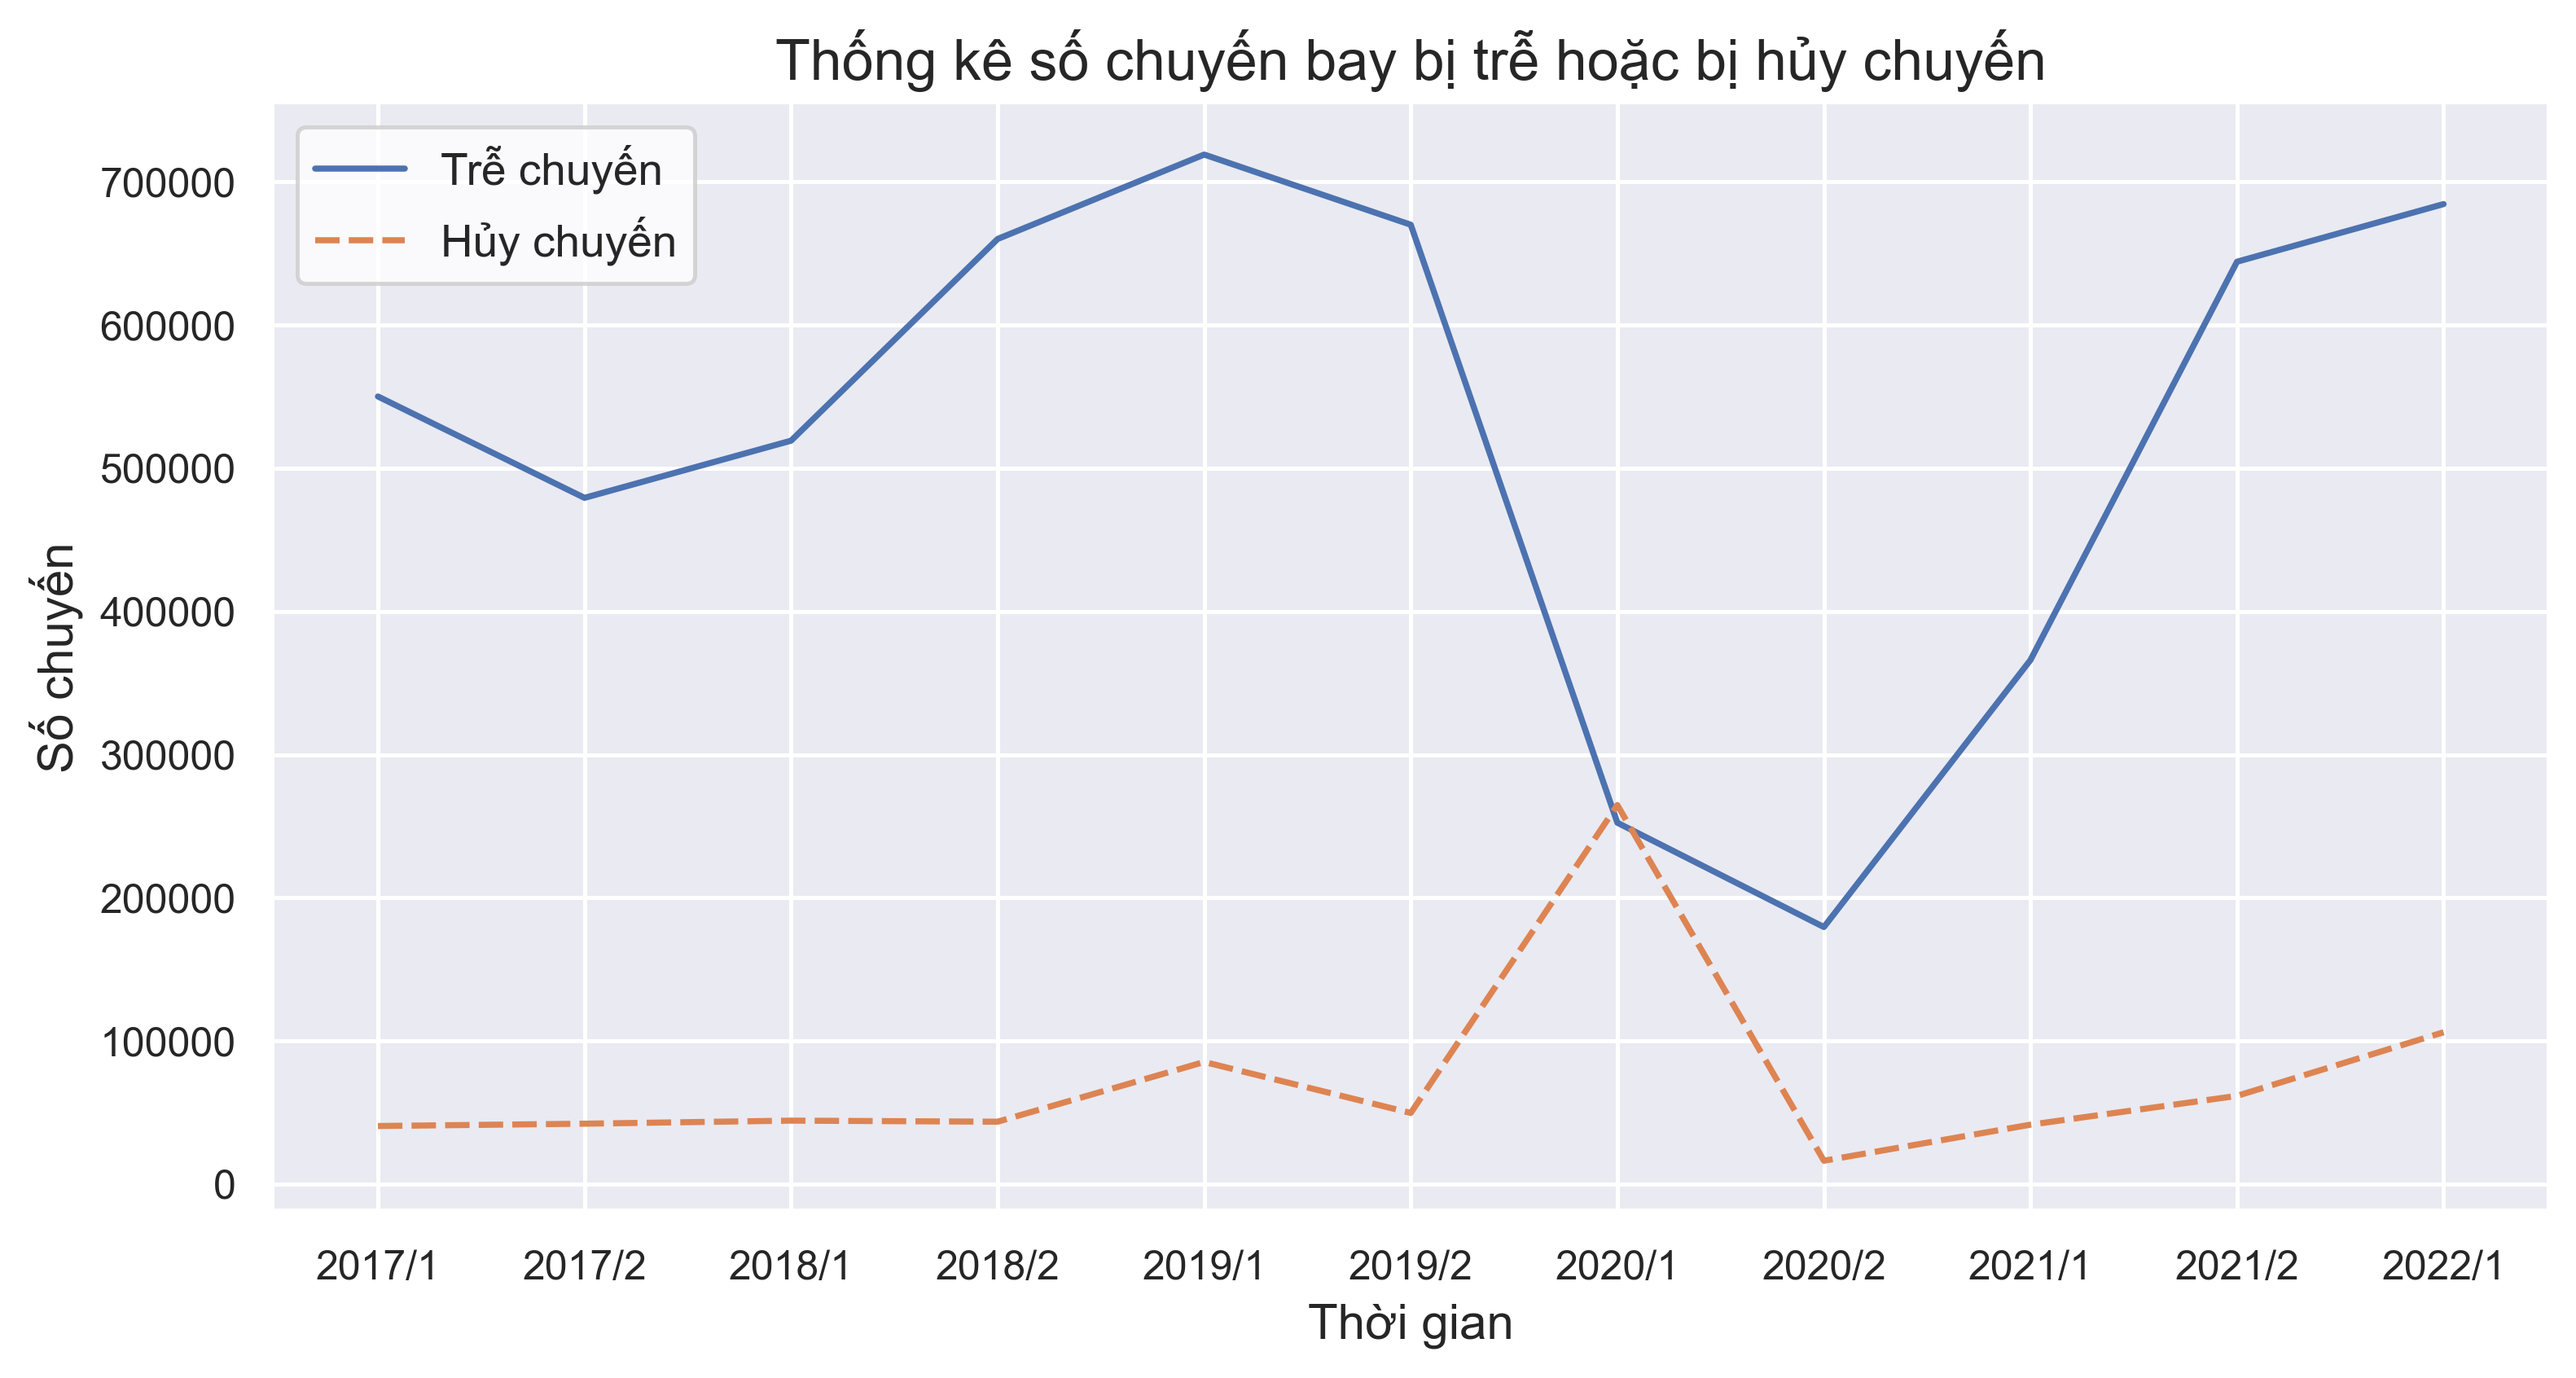

In [10]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
sns.set(rc={'axes.facecolor':'#FFFFFF', "grid.color": ".9"})
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
df_period_of_year = df0[['Trễ chuyến','Hủy chuyến','year period']].set_index('year period')

ax1 = sns.lineplot(data = df_period_of_year)

plt.xlabel('Thời gian', size=12)
plt.ylabel('Số chuyến', size=12)
plt.title('Thống kê số chuyến bay bị trễ hoặc bị hủy chuyến', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>Nhận xét:</h3>

- Có thể nhận thấy xu hướng tương đồng giữa số chuyến bị hủy, với tổng số chuyến (tăng vào 2018/2, giảm vào thời kì covid, dần cải thiện sau đó).

- Ngược lại, nhìn chung, số lượng chuyến bay bị hủy không có sự biến đổi nhiều, duy trì ở mức 50.000 chuyến/nửa năm. Chir có đặc biệt vào năm 2020, số chuyến bị hủy tăng lên gấp 3 lần, dễ hiểu do ảnh hưởng dịch bệnh.
- Sau khi hết dịch, số chuyến hủy trở lại giá trị như trước dịch, dù vậy nó đang có xu hướng tăng lên: đến nửa đầu 2022 gấp 2 lần giá trị trung bình được đo trước khi dịch covid bùng nổ.

<div style=" background-color:#d0f7da; font-family:sans-serif; color:#034747; line-height: 2em;font-size: 30px;">&nbsp;&nbsp;Câu 2</div>

<div style="color:#034747; font-family:sans-serif;  font-size: 18px; line-height: 2em">❓ Thời gian nào trong năm có tỉ lệ bị trễ chuyến cao? Lí do nào góp phần ảnh hưởng đến sự gia tăng này?
</div>
</br>
<div  style="font-family:sans-serif;">📍 Trả lời được sẽ dự đoán được khả năng bị hoãn chuyến theo các thời điểm trong năm và Dự đoán được các yếu tố ảnh hưởng tùy theo thời điểm đặt vé. Từ đó, hành khách sẽ chủ động hơn trong việc đặt vé, sắp xếp thời gian và cân nhắc các yếu tố ảnh hưởng, từ đó có sự chuẩn bị, dự phòng để có thể có lịch bay phù hợp.</div>


<div  style="font-family:sans-serif;">⚙ Xét theo từng tháng, tính tổng các giá trị: tổng số chuyến và số chuyến trễ. Sau đó tính tỉ lệ trễ vào các tháng trong năm, giá trị phần trăm làm tròn đến 1 chữ số sau dấu phẩy.</div>


In [18]:
df2 = df.copy()
df2 = df2[df2['year'] < 2022]
df2 = df2.groupby('month').sum().reset_index()
df2['tỉ lệ trễ'] = df2['arr_del15'] / df2['arr_flights'] * 100
df2['tỉ lệ trễ'] = df2['tỉ lệ trễ'].round(1)

<div  style="font-family:sans-serif;">⚙ Trực quan hóa bằng biểu đồ cột.</div>


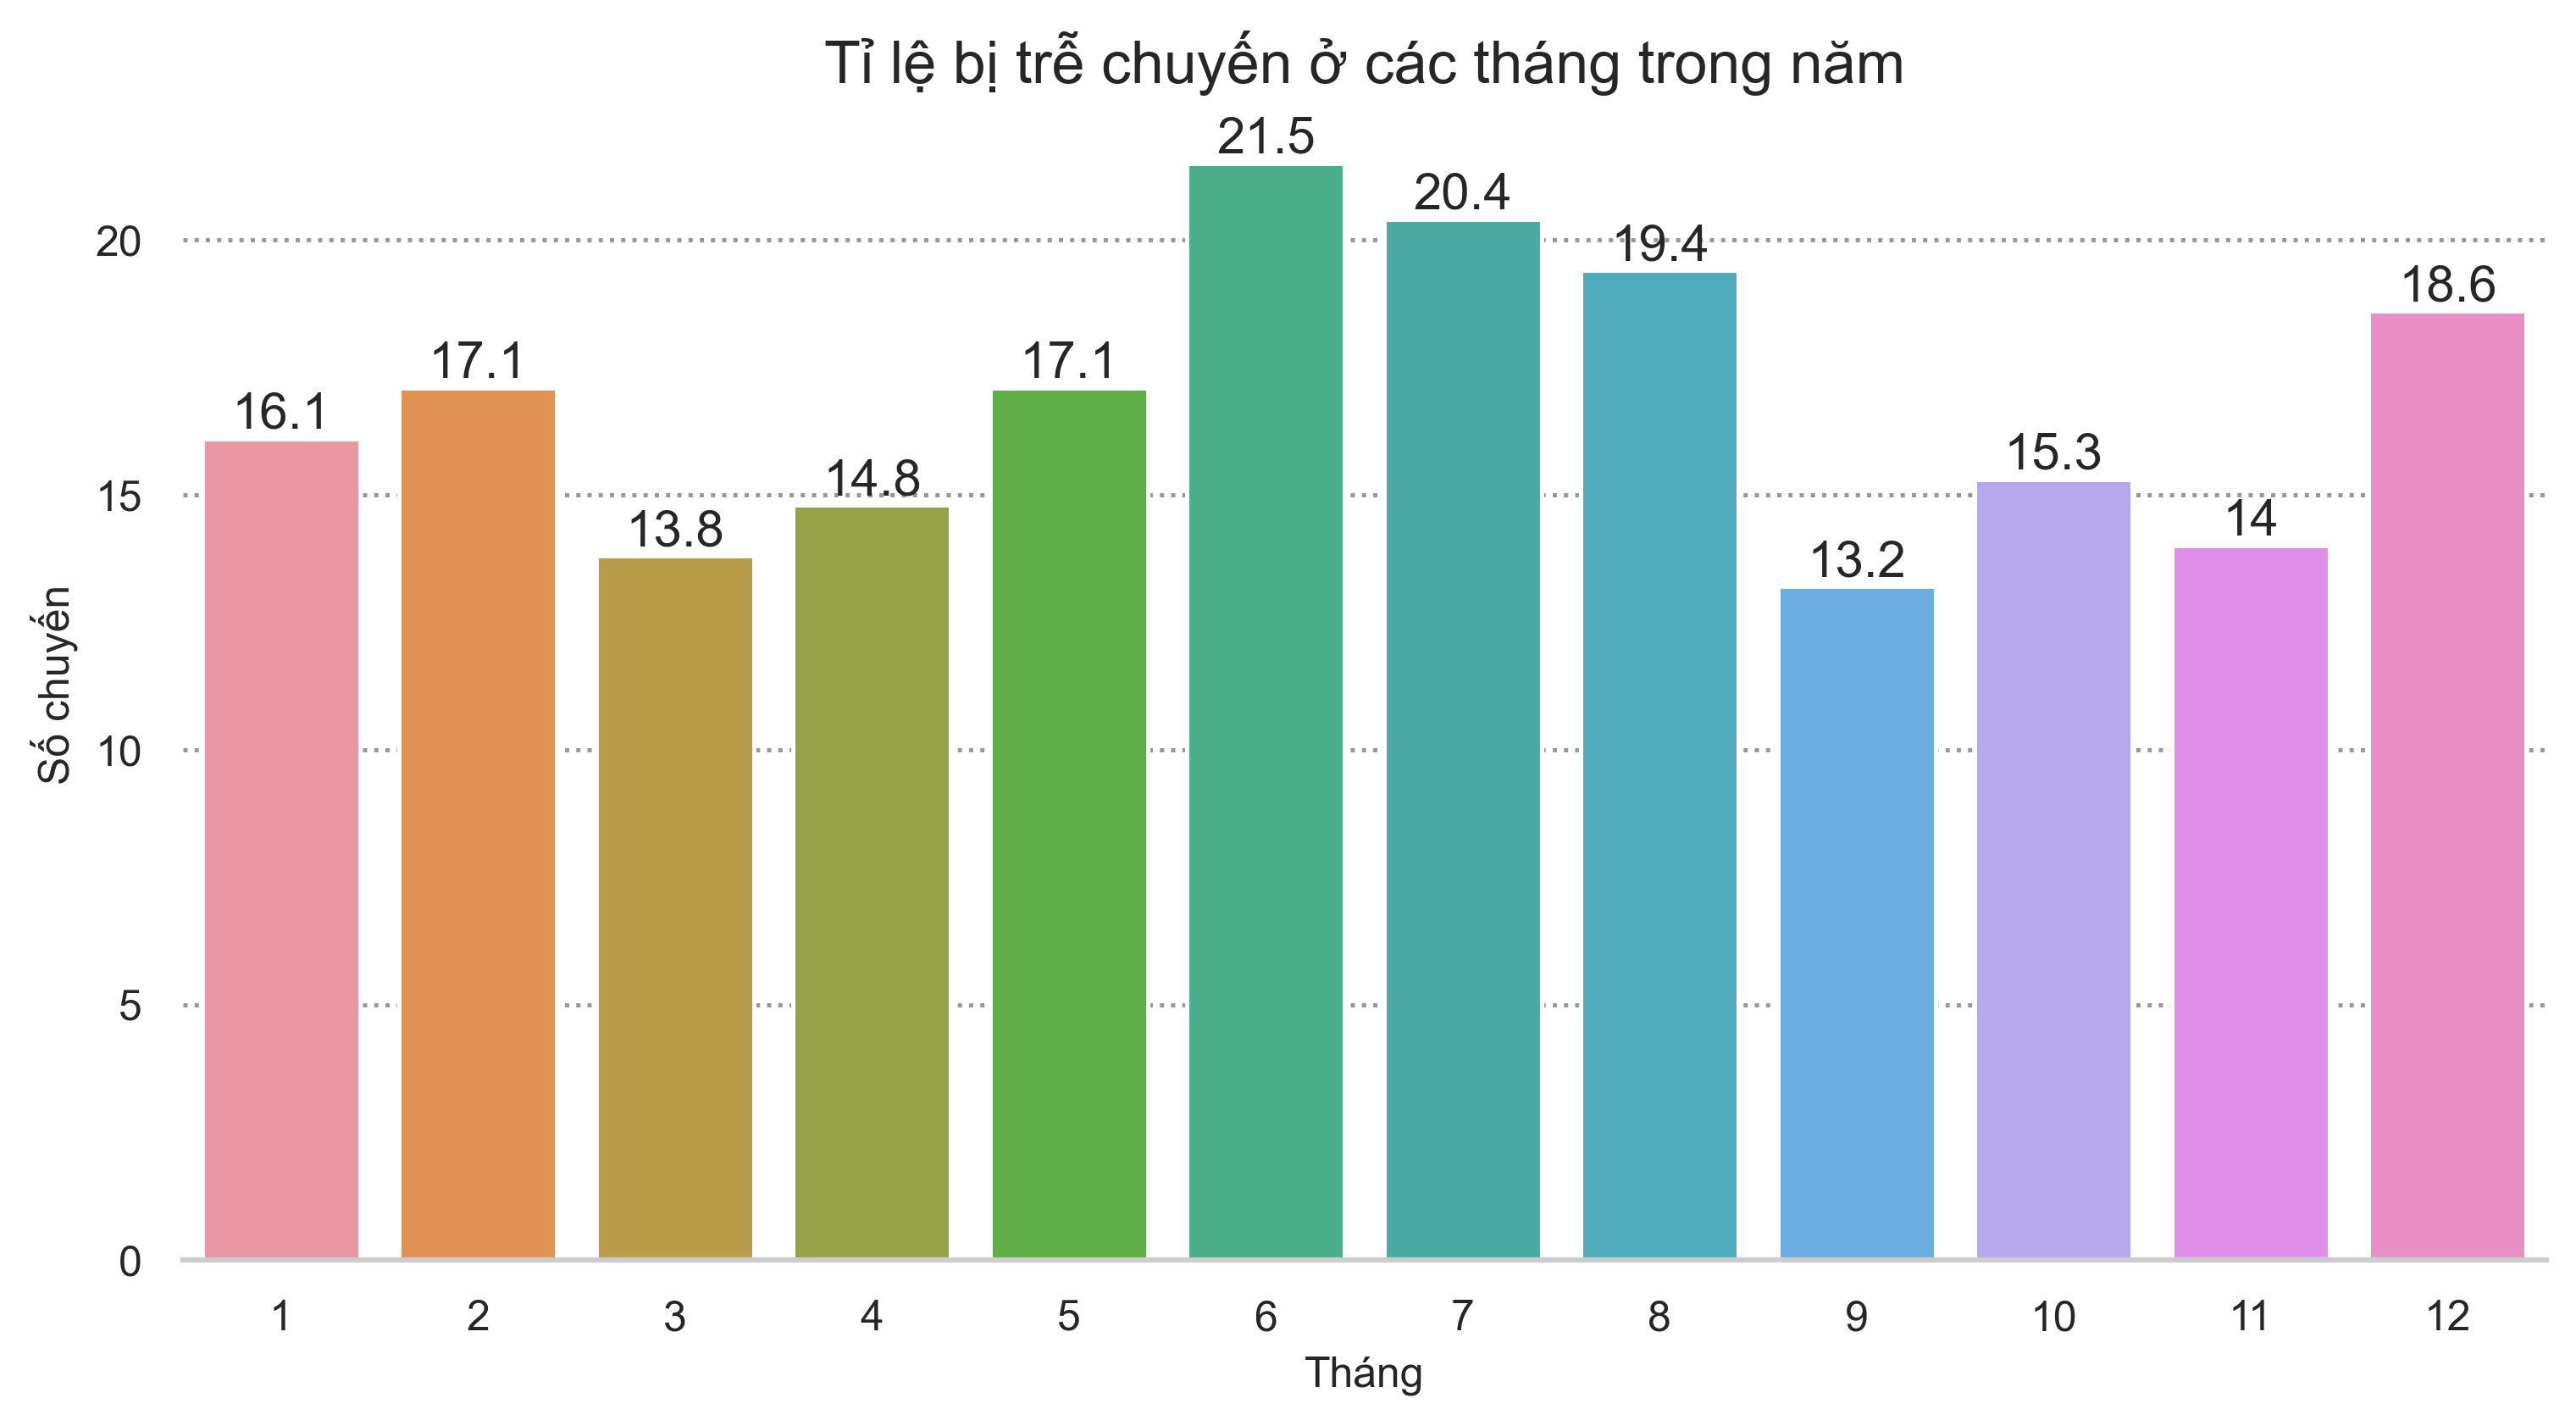

In [19]:
plt.rcParams['figure.dpi'] = 360
plt.subplots(figsize=(10,5))
ax1 =  sns.barplot(data = df2, x = 'month', y = 'tỉ lệ trễ')
ax1.bar_label(ax1.containers[0])
plt.xlabel('Tháng', size=10)
plt.ylabel('Số chuyến', size=10)
plt.title('Tỉ lệ bị trễ chuyến ở các tháng trong năm', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
sns.despine(left=True);

<h3>Nhận xét:</h3>

- Tỉ lệ bị trễ chuyến tăng cao vào 2 giai đoạn: tháng (12, 1, 2) và đặc biệt là tháng (6, 7, 8) và  rơi vào nghỉ đông, xuân và kì nghỉ hè. Khả năng bị trễ cao hơn có thể do đây là thời điểm nhu cầu du lịch, di chuyển tăng .
- Dựa trên giá trị của mỗi tháng, có thể chia làm 4 giai đoạn (trong bài sẽ gọi là 4 quý), cũng khá tương đồng với 4 mùa trong năm, đó là Quý I (tháng 12,1,2), Quý II (3,4,5), Quý III (6,7,8), Quý IV (9,10,11).



<div  style="font-family:sans-serif;">⚙ Thêm cột Quarter là thể hiện Quý I, II, III, IV đang xét. Xét theo từng quý, tính tỉ lệ ảnh hưởng của 5 yếu tố (hãng bay, thời tiết, hệ thống hàng không quốc gia, an ninh, trễ tàu bay). Tỉ lệ này được tính bằng X_ct / arr_del15 (với X_ct: Số chuyến delay bị ảnh hưởng bởi nguyên nhân X, arr_delay15: tổng số chuyến bị delay). Thay các tên cột sang tiếng Việt đễ dễ hiểu.</div>


In [17]:
def quarter(month):
    if month in (12,1,2):
        return 'I'
    if month in (3,4,5):
        return 'II'
    if month in (6,7,8):
        return 'III'
    if month in (9,10,11):
        return 'IV'
    

df_reason = df2[['month','arr_del15','carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']]

df_reason['quarter'] = df_reason['month'].apply(quarter)
df_reason = df_reason.groupby('quarter').sum().reset_index()
display(df_reason)
df_reason['hãng bay'] = (df_reason['carrier_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['thời tiết'] = (df_reason['weather_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['hệ thống hàng không'] = (df_reason['nas_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['an ninh'] = (df_reason['security_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason['trễ tàu bay'] = (df_reason['late_aircraft_ct'] / df_reason['arr_del15'] * 100).round(2)
df_reason2 = df_reason.iloc[:,-5:]
print('Bảng tỉ lệ ảnh hưởng của các nguyên nhân qua từng quý')
display(df_reason2)



,quarter,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
0,I,15,1460317.0,465601.36,52773.32,455779.76,3651.46,482513.82
1,II,12,1469152.0,470505.83,43814.28,438876.26,3870.53,512084.25
2,III,21,1839975.0,578079.18,80854.42,506010.41,4824.78,670205.59
3,IV,30,1093628.0,352919.26,29649.35,342725.53,3179.49,365156.55


Bảng tỉ lệ ảnh hưởng của các nguyên nhân qua từng quý


,hãng bay,thời tiết,hệ thống hàng không,an ninh,trễ tàu bay
0,31.88,3.61,31.21,0.25,33.04
1,32.03,2.98,29.87,0.26,34.86
2,31.42,4.39,27.50,0.26,36.42
3,32.27,2.71,31.34,0.29,33.39


<div  style="font-family:sans-serif;">⚙ Vẽ 4 biểu đồ tròn ứng với 4 quý, thể hiện phần trăm ảnh hưởng của 5 yếu tố lên việc hoãn chuyến.</div>


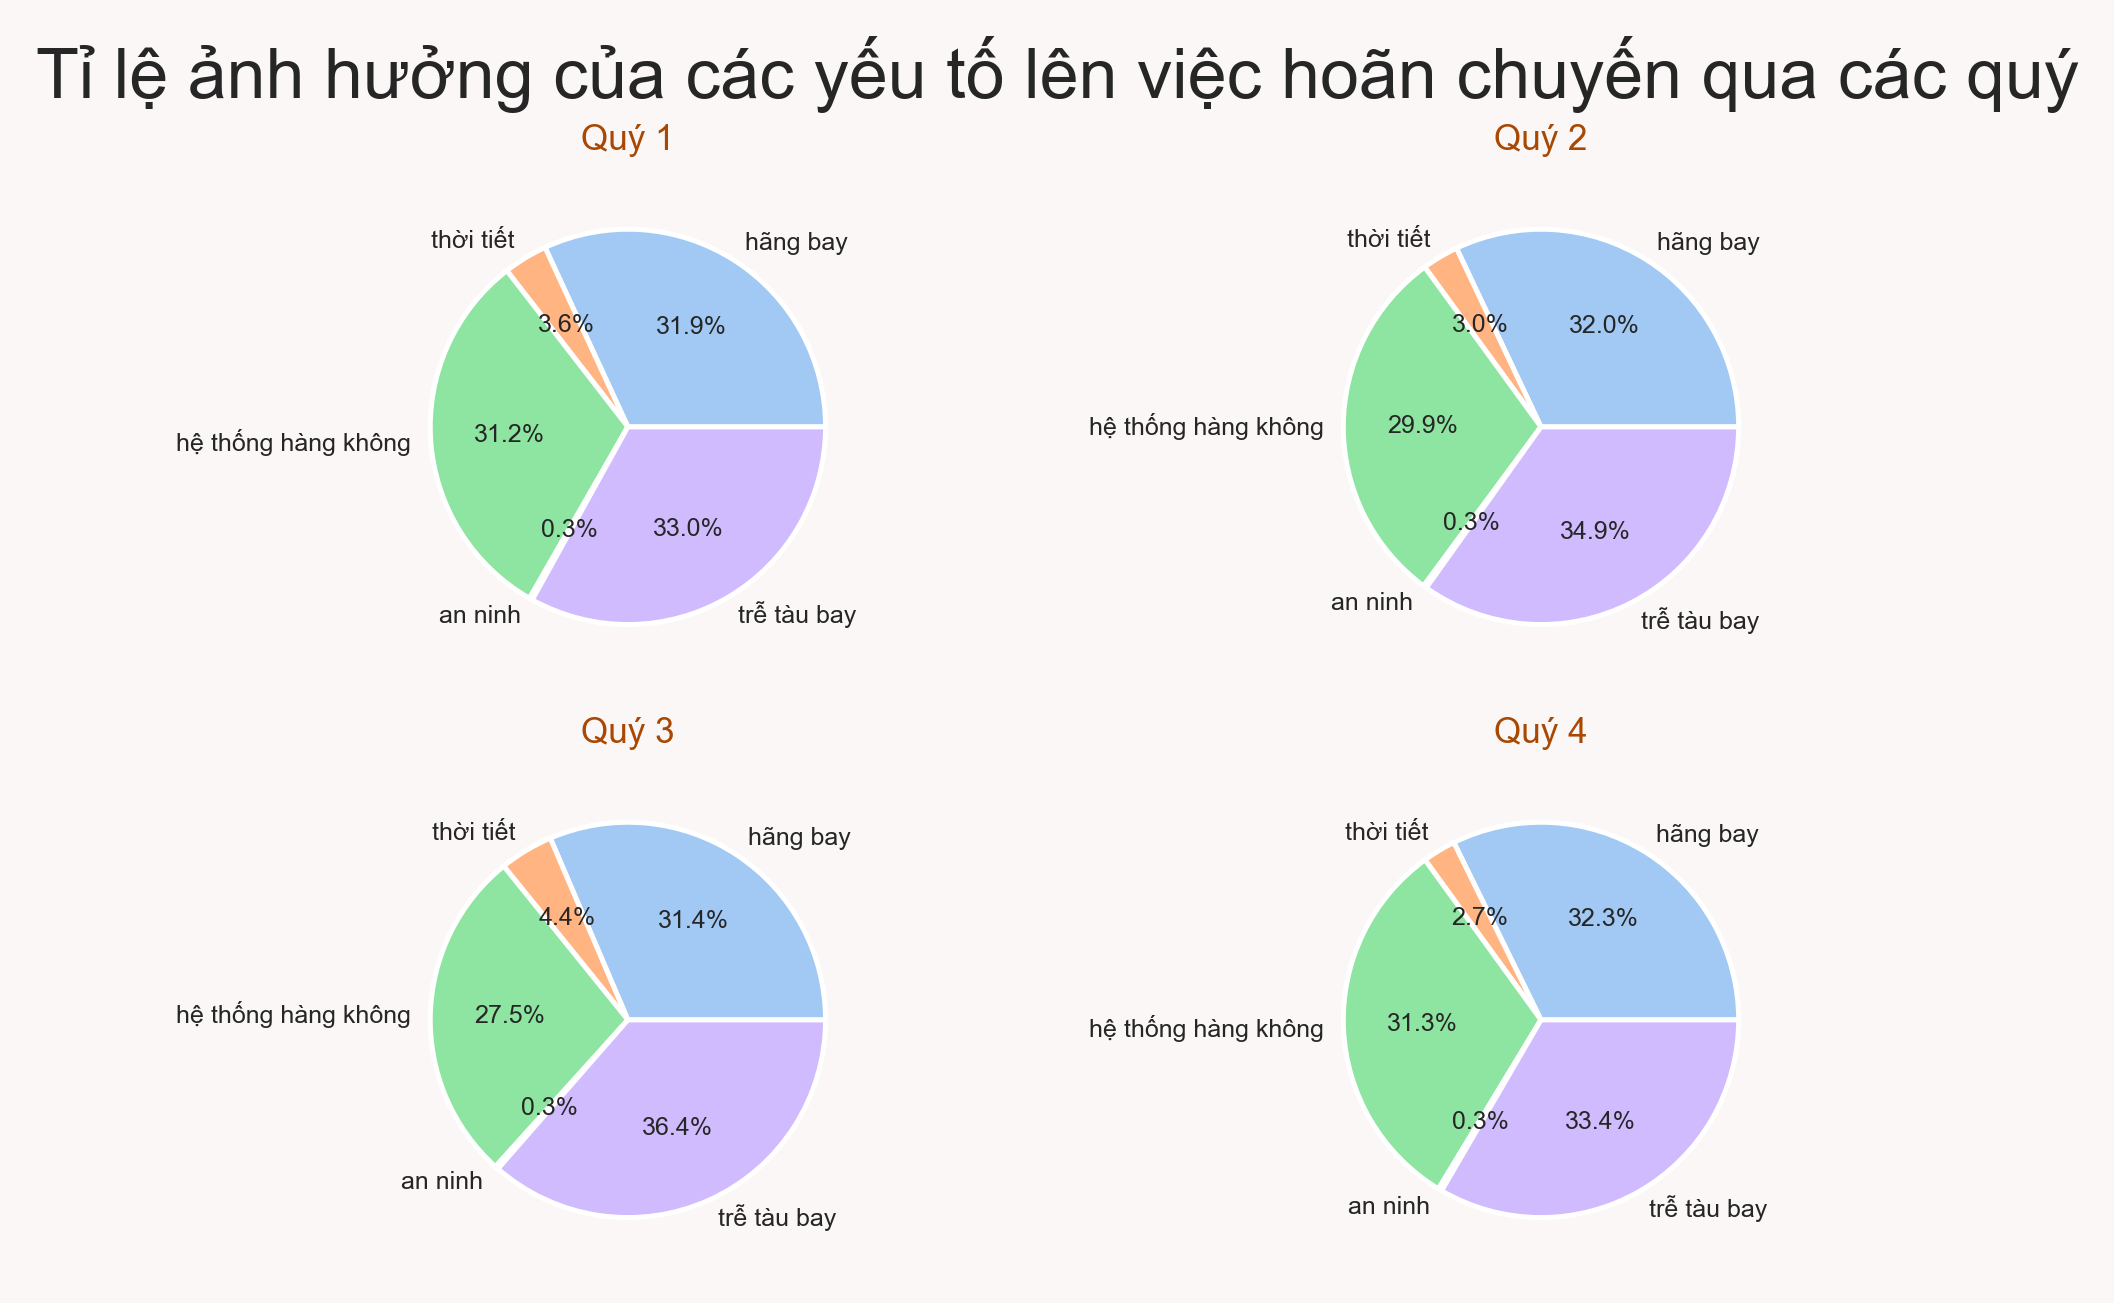

In [14]:
plt.rcParams['figure.dpi'] = 360
fig,axes = plt.subplots(2,2, facecolor='#fcf7f7')
fig.suptitle('Tỉ lệ ảnh hưởng của các yếu tố lên việc hoãn chuyến qua các quý', size = 14)
palette_color = sns.color_palette('pastel')
# declaring data
data = df_reason2.loc[0]
keys = df_reason2.columns
axes[0][0].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[0][0].set_title('Quý 1', size=7, color = '#a84803')


# declaring data
data = df_reason2.loc[1]
keys = df_reason2.columns
axes[0,1].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[0,1].set_title('Quý 2', size=7, color = '#a84803')

# declaring data
data = df_reason2.loc[2]
keys = df_reason2.columns
axes[1,0].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[1,0].set_title('Quý 3', size=7, color = '#a84803')

# declaring data
data = df_reason2.loc[3]
keys = df_reason2.columns
axes[1,1].pie(data , labels=keys, colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 5})
axes[1,1].set_title('Quý 4', size=7, color = '#a84803')

plt.show()

<h3>Nhận xét:</h3>

- Qua các quý, ta thấy sự tương đồng tỉ lệ trong các yếu tố: hãng bay (khoảng 32%); an ninh (0.3%).
- Vào quý 3 (thời gian bị delay cao nhất trong năm), tỉ lệ 2 yếu tố Thời tiết và Trễ tàu bay cao hơn cả. Có thể thấy lí do quý 3 bị delay nhiều là phần lớn là do 2 yếu tố này, do là vào thời điểm này thời tiết có sự bất ổn, có nhiểu cơn bão mùa hè, và việc số lượng chuyến bay tăng vào kì nghỉ hè ảnh hưởng đến việc tàu bay bị trễ.